# End to End multi class dog Breed Classification
 This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensor Flow hub.

 ## 1. Problem

 ## 2. Dataset
 The data we're using is from "https://www.kaggle.com/c/dog-breed-identification/data"

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features
Some information about the Data
* We are dealing with images (unstructured Data) so it's probably best we use deep learning/ transfer learning.
* There are 120 breeds of dogs (meaning 120 different classes) .
* There are 10k+ images in training
(these images have labels) and testing set (these images have no labels, because we will want to predict them)


In [1]:
import tensorflow as tf
print("TF version:",tf.__version__)
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

TF version: 2.10.0
GPU Available(yesss!!!!)


In [2]:
import tensorflow_hub as hub
print("Hub version:",hub.__version__)
# Check for GPU availability
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

Hub version: 0.16.1
GPU Available(yesss!!!!)


### Works only in in colab

In [3]:
# iMPORT tensor flow 2.0x
# try:
#   %tensorflow_version 2.x
# except:
#   pass

## Getting data into tensors

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
labels_csv=pd.read_csv("Dog_Vision/labels.csv");
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [7]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
# How much image are there for each brees
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

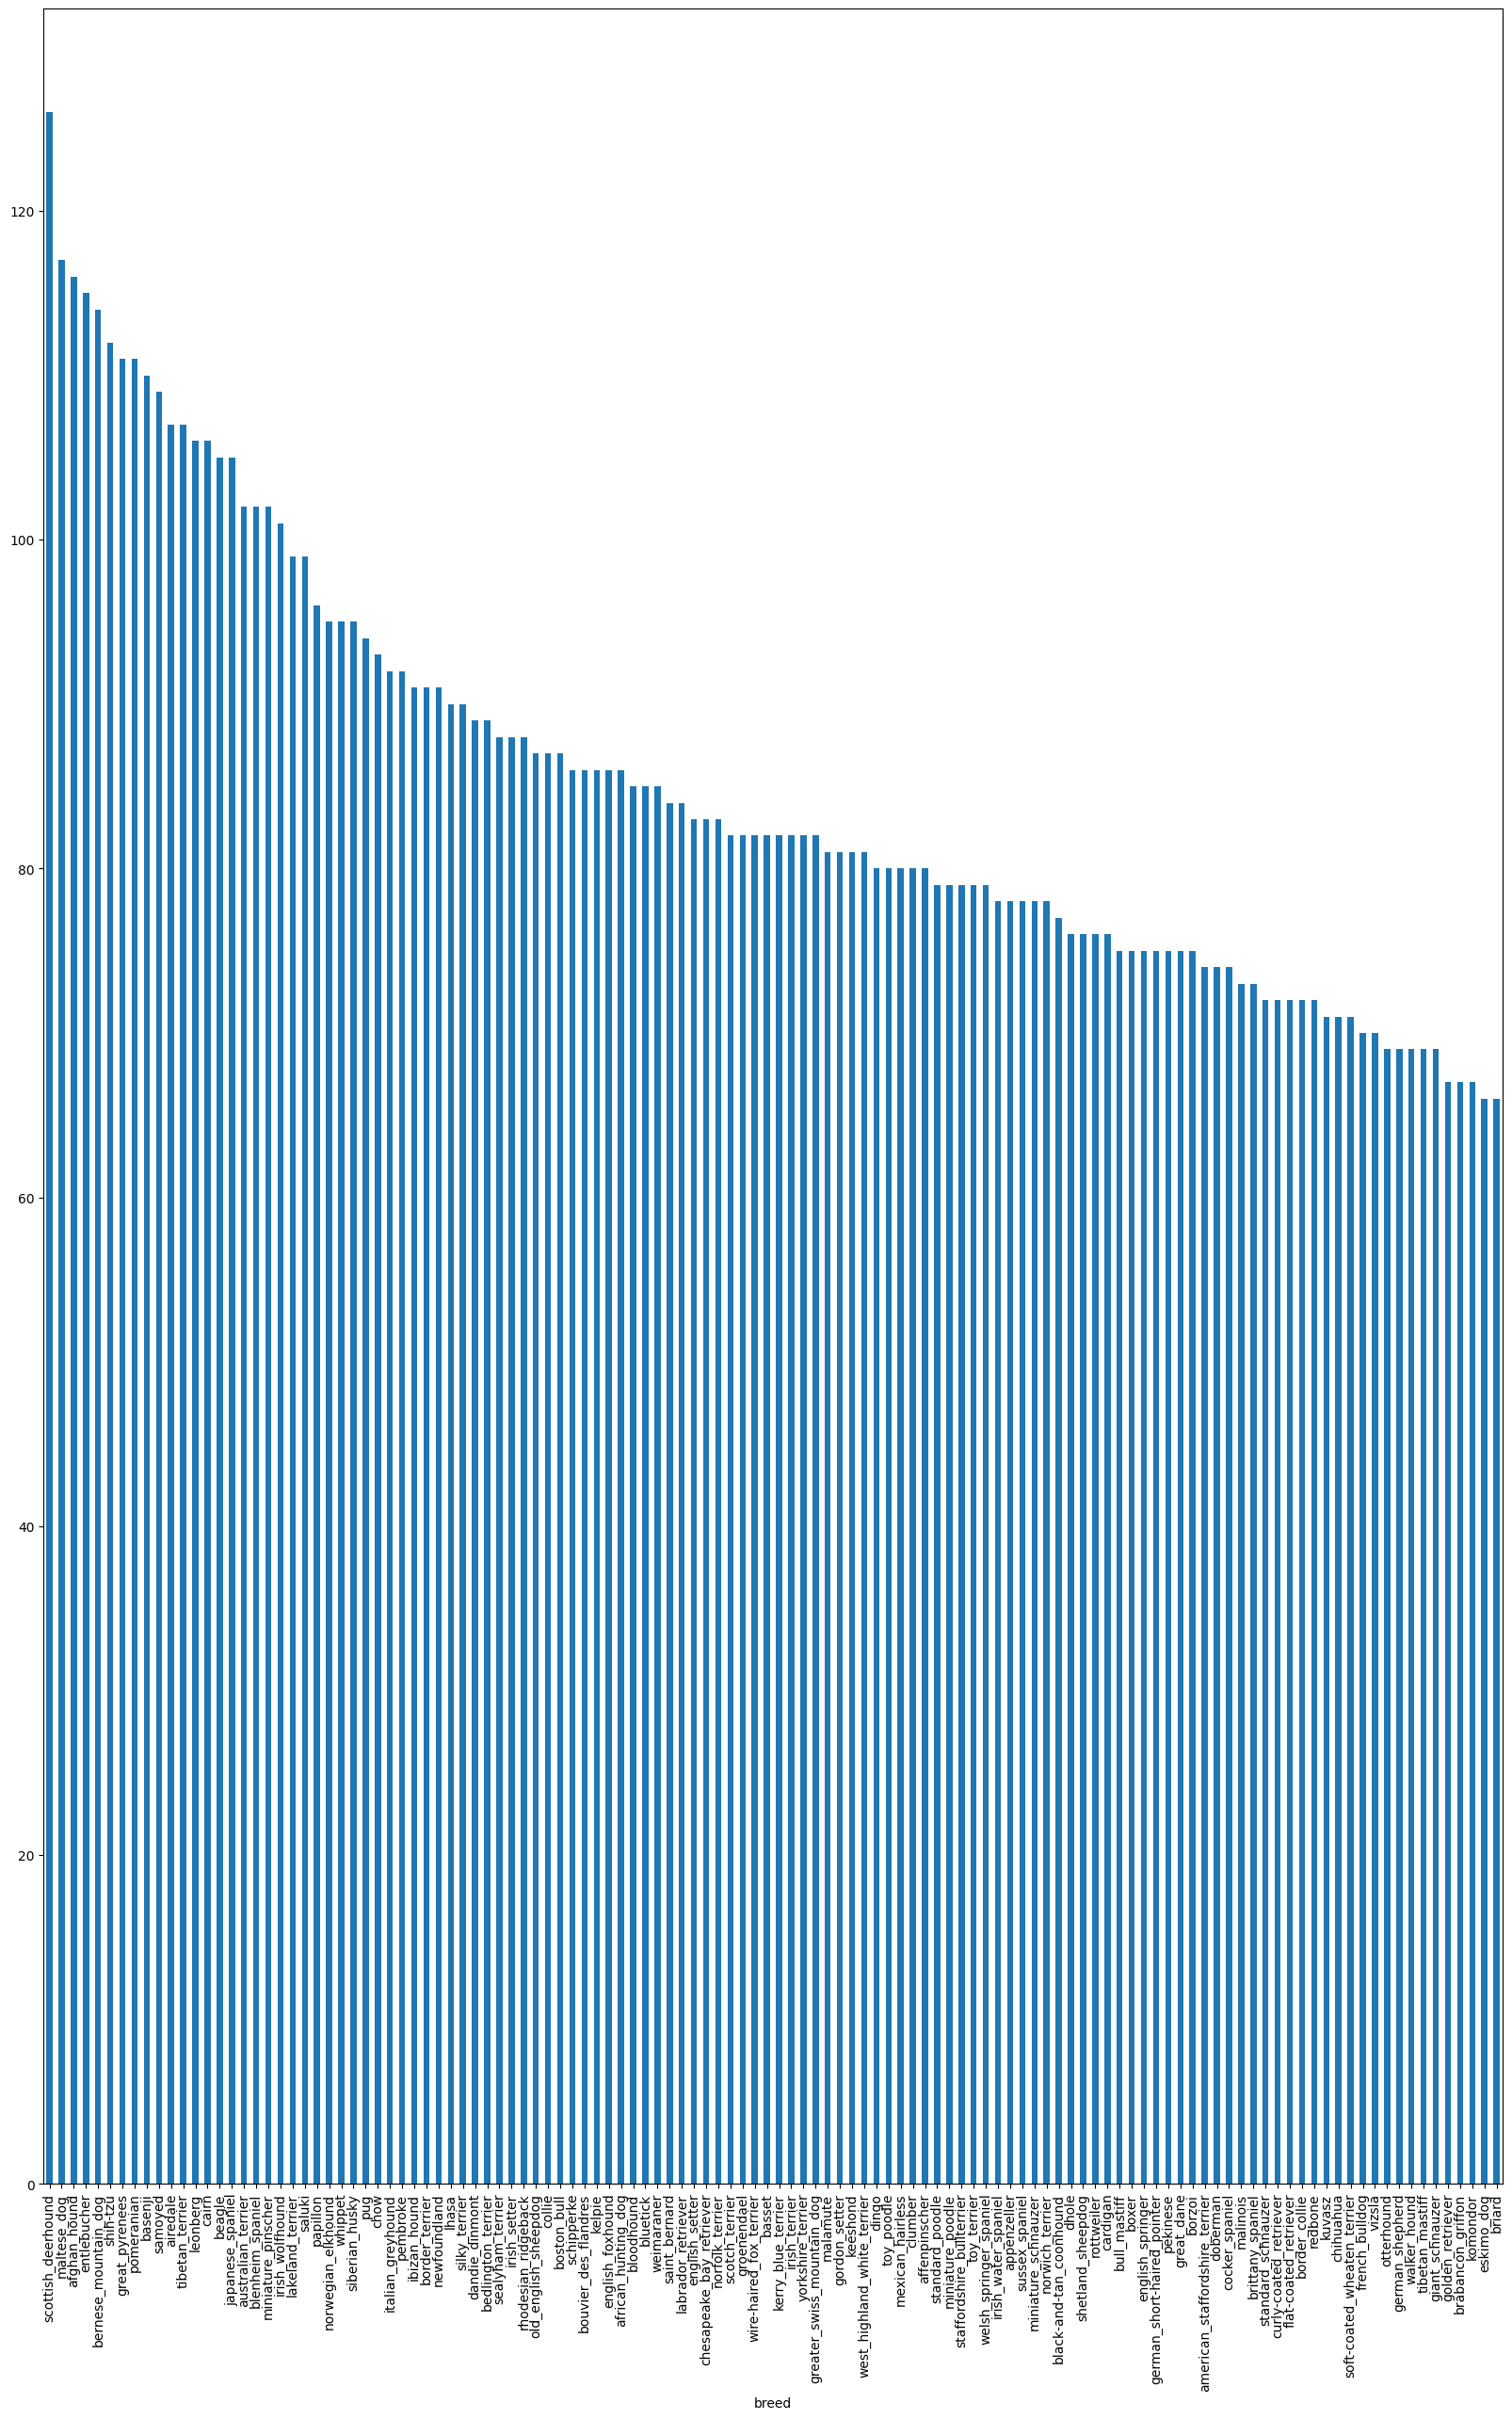

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,30))

In [10]:
# Viewing an image
from IPython.display import Image

In [11]:
import os
cwd = os.getcwd()
print(cwd)

D:\Conda_Pro_\TensorFLow


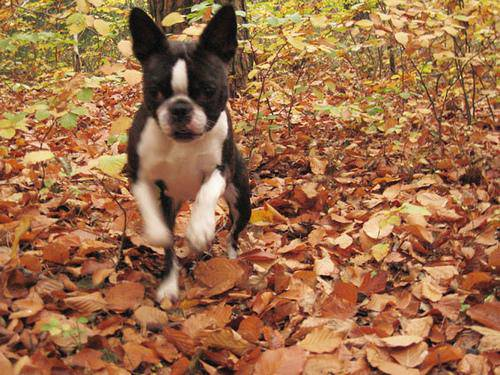

In [12]:
Image("Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

In [13]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [14]:
#creating pathnames from Image ID's
filenames=["Dog_Vision/train/"+fname +".jpg" for fname in labels_csv["id"]]
filenames[:5]

['Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [15]:
# Checking whether number of filename matches number of actual image files
if len(os.listdir("Dog_Vision/train/"))== len(filenames):
    print("FIlename match the actual amount of files!!! Proceed.")
else:
    print("FIlenames do not match the actual amount of files, check the target directory.")

FIlename match the actual amount of files!!! Proceed.


In [16]:
import numpy as np

In [17]:
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
#Finding unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [20]:
#turning a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#turning every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
# Creating our own validation set
X=filenames
y=boolean_labels

In [25]:
# We're going to start off experimenting with ~ 1000 images
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [26]:
import ipywidgets as widgets
from IPython.display import display

NUM_IMAGES = widgets.IntSlider(
    value=1000,
    min=1000,
    max=10000,
    step=1000,
    description='NUM_IMAGES:',
    continuous_update=False
)

display(NUM_IMAGES)


IntSlider(value=1000, continuous_update=False, description='NUM_IMAGES:', max=10000, min=1000, step=1000)

In [27]:
from sklearn.model_selection import train_test_split
#split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(8177, 8177, 2045, 2045)

## Preprocessing images into tensors
to preprocess our images into tensors we are going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into 
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be shape of (224,224)
6. Return the modifier `image`

In [28]:
# Convert image to Numpy
from matplotlib.pyplot import imread
image =imread(filenames[5])
image.shape

(375, 500, 3)

In [29]:
IMG_SIZE=224

# Create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
    """
    Takes an image filepath and turns the image into tensor
    """
    #read in an image file
    image=tf.io.read_file(image_path)
    #turn the jpg image into numerical tensor with 3 color channels(RGB)
    image=tf.image.decode_jpeg(image,channels=3)
    #convert the color chanel values from 0-255 to 0-1 values
    image=tf.image.convert_image_dtype(image,tf.float32)
    #Resize the image to desired value (224,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

    return image

In [30]:
tensor=tf.io.read_file(filenames[26])

In [31]:
tensor=tf.image.decode_jpeg(tensor,channels=3)
print(tensor)

tf.Tensor(
[[[ 59  68  65]
  [ 64  73  70]
  [ 71  80  77]
  ...
  [115 128 108]
  [115 128 108]
  [110 123 103]]

 [[ 65  74  71]
  [ 72  81  78]
  [ 79  88  85]
  ...
  [114 127 107]
  [117 130 110]
  [116 129 109]]

 [[ 68  77  74]
  [ 76  85  82]
  [ 83  92  89]
  ...
  [114 127 107]
  [120 133 113]
  [123 136 116]]

 ...

 [[173 200 155]
  [164 179 136]
  [181 166 133]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[142 159 117]
  [147 154 113]
  [189 174 141]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[167 179 139]
  [167 172 132]
  [204 188 155]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]], shape=(500, 375, 3), dtype=uint8)


## Turning our data into batches
 why turn our data into batches
 if we are processing Let's say you're trying to process 10,000 plus images in one go. They all might not fit into the memory. So that's why we do 32. This is the bad size images at a time. We can manually adjust the batch size if we need to. In order to tensor flow effectively, we need our data in the form of tensor tuples, which looks like `(image ,label)`.

In [32]:
# Create  a simple function to return a tuple (image,tuple)
def get_image_label(image_path,label):
    '''
    takes an image file path name and the associated label,
    processes the image and returns a tuple of (image,label).
    '''
    image=process_image(image_path)
    return image,label


In [33]:
#demo of the above
process_image(X[42],y[42]) 

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

`tf.data.Dataset.from_tensor_slices` Creates a `Dataset` whose elements are slices of the given tensors.

The given tensors are sliced along their first dimension. This operation
preserves the structure of the input tensors, removing the first dimension
of each tensor and using it as the dataset dimension. All input tensors
must have the same size in their first dimensions.

>>> # Slicing a 1D tensor produces scalar tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
>>> list(dataset.as_numpy_iterator())
[1, 2, 3]

>>> # Slicing a 2D tensor produces 1D tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
>>> list(dataset.as_numpy_iterator())
[array([1, 2], dtype=int32), array([3, 4], dtype=int32)]

>>> # Slicing a tuple of 1D tensors produces tuple elements containing
>>> # scalar tensors.
>>> dataset = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))
>>> list(dataset.as_numpy_iterator())
[(1, 3, 5), (2, 4, 6)]

>>> # Dictionary structure is also preserved.
>>> dataset = tf.data.Dataset.from_tensor_slices({"a": [1, 2], "b": [3, 4]})
>>> list(dataset.as_numpy_iterator()) == [{'a': 1, 'b': 3},
...                                       {'a': 2, 'b': 4}]
True


In [174]:
#Define the batch size , 32 is a good start
BATCH_SIZE=32
#Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Creates batches of data out of image X and y pairs.
    Shuffles the data if its training but doesnt shuffle if its validation data.
    Also accepts test data as input (no labels)
    """
#if the data is a test datset, we probably don't have labels
    if test_data:
        print("Creating test data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch


# If the data set is valid dataset , we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#file paths
                                             tf.constant(y)))#Labels
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#file path
                                            tf.constant(y))) #labels

# shuffling the pathnames and labels before mapping image processor function is faster than shuffling images
        data=data.shuffle(buffer_size=len(X))

#Create (image,label) tuples (this also turns the image path into a preprocessed image)
        data=data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    print("Succesfully created batches")
    return data_batch


In [35]:
# create training and validation set
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches
Creating validation data batches


In [36]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches


In [37]:
import matplotlib.pyplot as plt
def show25_images(images,labels):
    """
    Display a plot of 25 images and their labels from a data batch
    """

#setup the figure
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        #display an image
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])

In [38]:
y[0].argmax()

19

In [39]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [40]:
train_images,train_labels=next(train_data.as_numpy_iterator())#numpy_iterator unbatches the batches
train_images,train_labels

(array([[[[9.46581781e-01, 8.48542571e-01, 7.30895519e-01],
          [8.92257571e-01, 7.94218361e-01, 6.72649682e-01],
          [8.90059948e-01, 7.91705608e-01, 6.69506669e-01],
          ...,
          [9.08500850e-01, 8.07170212e-01, 7.00972795e-01],
          [9.01836812e-01, 8.07123899e-01, 7.14196742e-01],
          [9.25919175e-01, 8.27879965e-01, 7.41605401e-01]],
 
         [[9.24531221e-01, 8.33477318e-01, 7.12337554e-01],
          [9.30658698e-01, 8.39604735e-01, 7.18036056e-01],
          [9.92014587e-01, 9.00084317e-01, 7.77885437e-01],
          ...,
          [8.57102334e-01, 7.55210459e-01, 6.49293602e-01],
          [8.42983663e-01, 7.48800874e-01, 6.54813409e-01],
          [8.54779482e-01, 7.60232925e-01, 6.66973054e-01]],
 
         [[9.64233279e-01, 8.72137725e-01, 7.56267548e-01],
          [9.31083798e-01, 8.40887725e-01, 7.19319046e-01],
          [9.96506274e-01, 9.06535625e-01, 7.85129547e-01],
          ...,
          [9.21649516e-01, 8.21435630e-01, 7.1031

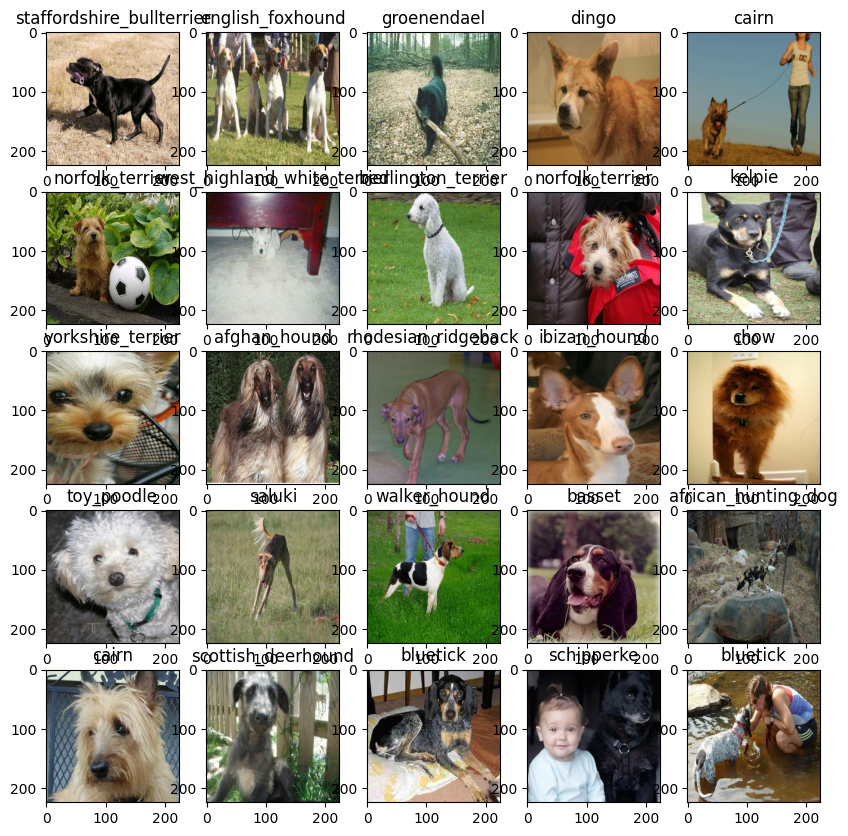

In [41]:
show25_images(train_images,train_labels)

In [42]:
val_images,val_labels=next(val_data.as_numpy_iterator())#numpy_iterator unbatches the batches
val_images,val_labels

(array([[[[0.4615459 , 0.5478204 , 0.60272235],
          [0.4615459 , 0.5478204 , 0.60272235],
          [0.45909494, 0.5453694 , 0.60027134],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         [[0.45522588, 0.5415004 , 0.59640235],
          [0.45522588, 0.5415004 , 0.59640235],
          [0.4527749 , 0.5390494 , 0.59395134],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         [[0.45098042, 0.5372549 , 0.5921569 ],
          [0.45098042, 0.5372549 , 0.5921569 ],
          [0.44852945, 0.5348039 , 0.5897059 ],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         ...,
 
         [[0.18869358, 0.32987005, 0.42398772],
          [0.18944

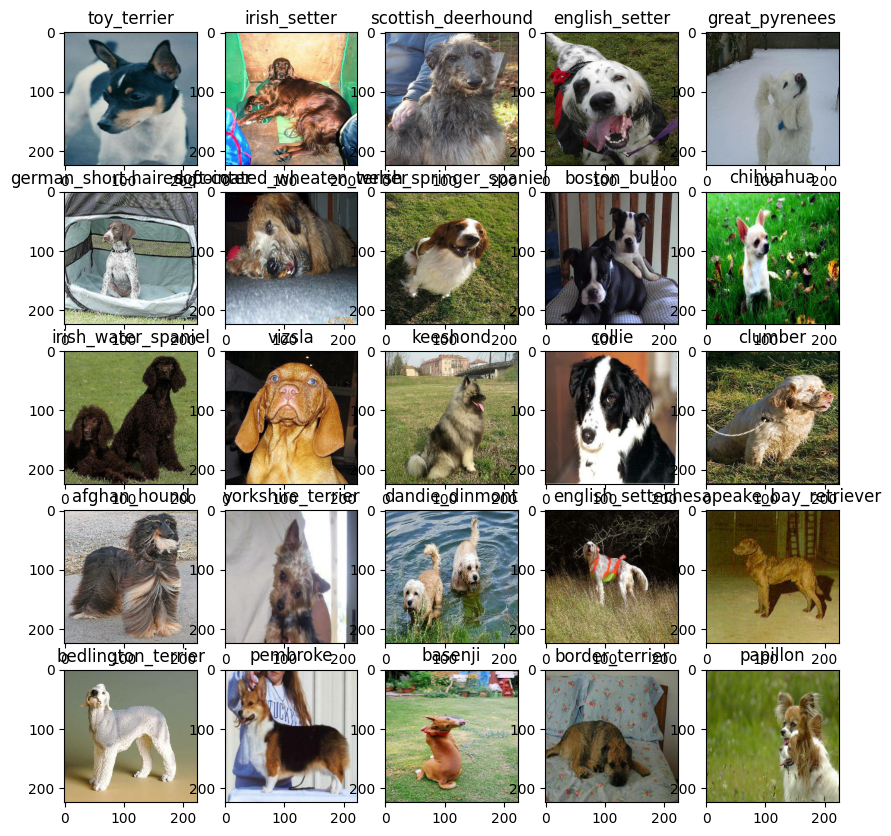

In [43]:
show25_images(val_images,val_labels)

## Building a model

before we build a model, there are a few things we need to define 
* The input shape (our images shape, in the form of tensors) to our model
* The output shape (image labels, in the form of tensors) to our model
* The URL of yhe model we want to use is from tensorflowhub

In [45]:
#setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]#batch , height , width, colour channels
#setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

#setup model URL from tensorflow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

We have our inputs and outputs model ready to go.
let's put them into into a keras deep learning model!

* Take the input shape, output shape and the model we have chosen as parameters.
* Defines the layers in a kera model in sequential fashion
* Compiles the models (says its hould be evaulated and improved)
* Builds the model (tells the model the inut shape it will be getting).
* Returns the model

  Steps: https://www.tensorflow.org/guide/keras

In [49]:
from tensorflow import keras
from keras.layers import Dense

In [52]:
# Create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building model with:",MODEL_URL)

#Setup the model layers
    model=tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (input Layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")# Layer 2 (Output Layer)
        
    ]) 
#Compile the model
    model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#Build the model
    model.build(INPUT_SHAPE)
    return model

In [53]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


* What is softmax?
Mathematical function which transforms the input in the interval in between (0,1)
* Which activation ? Which Loss?
* Binary Classification = Sigmoid Activation function, Loss = Binary Crossentropy
* Multi-Classification =  Softmax Activation function, Loss =  Categorical Crossentropy


## Callback Function
Callbacks are helper funcitons a model can use during training to do such thigs as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for the TensorBoard which helps track our models progress and another for early stooping the model from training for too long

## TensorBoard Callback
To setup a Tensorboard callback , we need to do 3 things:
1. Load the tensorboard notebook extention
2. Create a TensorBoard callback which is able to save logs to directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with `%tensorboard` magic funciton (we'll do this after training the model training).

In [54]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [55]:
import datetime
#Create a funciton to build a TensorBoard Callback

def create_tensorboard_callback():
    #create a log directory for stornig Tensorboard logs
    logdir=os.path.join("Dog_Vision/Log",
                       #Make it so that the logs get tracked whenever we run an experment
                       datetime.datetime.now().strftime("%d%m&Y-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback
This callback helps stop our model from overfitting by stopping training if 

In [57]:
#Creating early stopping clalback function
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy"
                                                ,patience=3)

## Training our model on a subset of 1000

In [65]:
NUM_EPOCHS=widgets.IntSlider(
    value=100,
    min=10,
    max=100,
    step=10,
    description='NUM_EPOCH:',
    continuous_update=False
)

display(NUM_EPOCHS)

IntSlider(value=100, continuous_update=False, description='NUM_EPOCH:', min=10, step=10)

In [61]:
# Checking if gpu is still 
print("GPU", "Available (yessss!!!)" if tf.config.list_physical_devices("GPU") else "not available :")

GPU Available (yessss!!!)


* Create a model using `create_mode()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validatino data, number of epochs to train for (NUM_EPOCHS) and the callback we'd like to use
* Return the model

In [67]:
epochs = NUM_EPOCHS.value
def train_model():
    """
    Trains a given model and returns the trained the version
    """
    #Create a model
    model=create_model()

    # Create new Tensorboard session everytime we train a model
    tensorboard=create_tensorboard_callback()

    #Fit the model to the data passing it  the callbacks we created
    model.fit(x=train_data,
             epochs=epochs,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard,early_stopping])
    return model
    

In [68]:
#Fitting model to the data
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
256/256 [==============================] - 72s 211ms/step - loss: 1.5055 - accuracy: 0.6400 - val_loss: 0.7215 - val_accuracy: 0.7809
Epoch 2/100
256/256 [==============================] - 38s 148ms/step - loss: 0.4169 - accuracy: 0.8749 - val_loss: 0.6657 - val_accuracy: 0.7956
Epoch 3/100
256/256 [==============================] - 38s 147ms/step - loss: 0.2368 - accuracy: 0.9380 - val_loss: 0.6573 - val_accuracy: 0.7971
Epoch 4/100
256/256 [==============================] - 36s 140ms/step - loss: 0.1505 - accuracy: 0.9676 - val_loss: 0.6485 - val_accuracy: 0.8020
Epoch 5/100
256/256 [==============================] - 36s 141ms/step - loss: 0.1036 - accuracy: 0.9829 - val_loss: 0.6507 - val_accuracy: 0.8093
Epoch 6/100
256/256 [==============================] - 37s 143ms/step - loss: 0.0712 - accuracy: 0.9906 - val_loss: 0.6656 - val_accuracy: 0.8054
Epoch 7/100
256/256 [==========

In [70]:
# Checking the Tensorboard logs
%tensorboard --logdir Dog_Vision/Log

## Making and evaluating predictions using a trained model

In [71]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [73]:
predictions =model.predict(val_data,verbose=2)
predictions

64/64 - 7s - 7s/epoch - 111ms/step


array([[1.2326632e-07, 1.3379780e-09, 1.6694132e-07, ..., 7.8382698e-07,
        2.3902821e-05, 3.3803590e-06],
       [5.5769565e-08, 5.6408294e-06, 2.4566530e-08, ..., 2.6971369e-07,
        7.1515149e-10, 1.3542311e-05],
       [1.9562701e-07, 9.1633210e-06, 8.4111537e-07, ..., 4.6884827e-05,
        5.1189876e-05, 4.0663443e-07],
       ...,
       [1.2011863e-08, 2.1411985e-05, 8.1464746e-09, ..., 4.7246239e-08,
        1.5484599e-06, 3.1394600e-06],
       [7.3726358e-10, 5.9336756e-08, 4.6745402e-10, ..., 2.1216766e-09,
        7.2047690e-08, 9.2553154e-10],
       [1.5333668e-06, 8.7520668e-08, 5.0813009e-07, ..., 7.4699977e-07,
        6.6437089e-08, 6.6153940e-09]], dtype=float32)

In [74]:
predictions.shape

(2045, 120)

In [75]:
len(y_val)

2045

In [85]:
#First prediction
index=42
print(predictions[index])
print(f"Max value (probability of predicition):{np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max Index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[index])]}")


[1.02352065e-08 1.53673554e-08 3.52539908e-09 2.32345947e-08
 1.82365216e-08 4.20733431e-06 3.35861401e-08 1.93854799e-08
 2.46199008e-08 8.88220719e-10 4.66129935e-09 9.97938216e-01
 1.87336124e-09 1.05435333e-06 1.98489691e-09 9.62035642e-08
 8.30511126e-05 4.20194084e-08 6.95631002e-08 1.80892914e-06
 1.78479720e-09 1.09286633e-08 8.35776817e-08 2.44911632e-07
 1.17254878e-07 6.35756026e-09 4.04584534e-06 6.42095472e-07
 1.07770362e-08 3.45730555e-08 2.15809152e-07 4.75063280e-06
 7.23499170e-06 2.93499616e-05 1.72048136e-08 9.21828323e-05
 4.58045690e-08 5.19627258e-11 3.24723998e-10 1.07818983e-10
 1.07180711e-06 1.36073695e-05 2.12771567e-07 1.53154105e-07
 9.01012299e-06 2.05243452e-07 1.13889376e-09 8.90605867e-10
 5.80683832e-07 1.42183168e-07 2.06072605e-06 1.50482364e-08
 4.31646498e-07 1.51766674e-03 7.54665521e-08 2.05761808e-09
 1.47300403e-08 5.08997609e-08 1.93704164e-10 1.34690666e-07
 9.54678256e-08 2.37397330e-07 2.72378088e-07 4.63664884e-09
 3.93430755e-09 2.769014

In [87]:
unique_breeds[11]

'bernese_mountain_dog'

Prediction probabilities are also known as confidence levels

In [90]:
def get_pred_label(prediction_probabilities):
    """
    Turns our array of prediction probabilties into a label
    """
    return unique_breeds[np.argmax(prediction_probabilities)]
    #Get a predicted label based on an array of prediction probabilities
pred_label=get_pred_label(predictions[81])
pred_label

'entlebucher'

In [91]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

We will have to unbatchify validation set, to make predictions on the the validation images then compare those predictions to the validation labels(truth labels)

In [95]:
images_=[]
labels_=[]
#loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)
images_[0],labels_[0]

(array([[[0.4615459 , 0.5478204 , 0.60272235],
         [0.4615459 , 0.5478204 , 0.60272235],
         [0.45909494, 0.5453694 , 0.60027134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45522588, 0.5415004 , 0.59640235],
         [0.45522588, 0.5415004 , 0.59640235],
         [0.4527749 , 0.5390494 , 0.59395134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45098042, 0.5372549 , 0.5921569 ],
         [0.45098042, 0.5372549 , 0.5921569 ],
         [0.44852945, 0.5348039 , 0.5897059 ],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        ...,
 
        [[0.18869358, 0.32987005, 0.42398772],
         [0.1894466 , 0.33062306, 0.42179

In [103]:
#create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image,label) Tensors and returns separate arrays 
    of images and labels
    """
    images=[]
    labels=[]
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels
# Unbatchify the validation data
val_images, val_labels=unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.4615459 , 0.5478204 , 0.60272235],
         [0.4615459 , 0.5478204 , 0.60272235],
         [0.45909494, 0.5453694 , 0.60027134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45522588, 0.5415004 , 0.59640235],
         [0.45522588, 0.5415004 , 0.59640235],
         [0.4527749 , 0.5390494 , 0.59395134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45098042, 0.5372549 , 0.5921569 ],
         [0.45098042, 0.5372549 , 0.5921569 ],
         [0.44852945, 0.5348039 , 0.5897059 ],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        ...,
 
        [[0.18869358, 0.32987005, 0.42398772],
         [0.1894466 , 0.33062306, 0.42179

# Now we have got ways yo get:
* Prediction labels
* Validation labels(truth tables)
* Validation images

 We'll create a function which:
 * Takes An array of prediction probabilities, an array of truth labels and an array of image integers.
 * Convert the prediction probabilities to a predicted label.
 * Plot the predicted label its predicted probability, the truth label and the truth image on a single plot

In [124]:
def plot_pred(prediction_probabilities,labels,images,n=153):
    """
    View the predicition , ground truth and image for sample n
    """

    pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

    #Get the pred label
    pred_label=get_pred_label(pred_prob)

    #Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    #Change the color of the title depending on if the prediction is wrong
    if pred_label == true_label:
        color="green"
    else:
        color="red"

    # Change plot title to be predicted , probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
    np.max(pred_prob)*100,
    true_label),color=color)

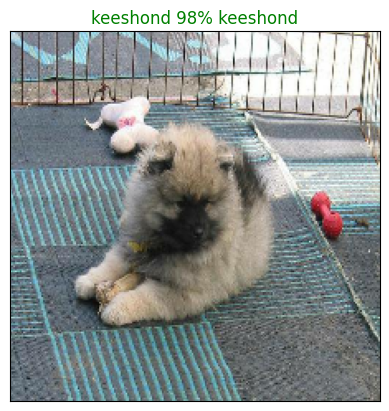

In [125]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

# Let's make another model to view our model's top 10 prediction
This function will:
* Take an input of prediction Probabilities array underground truth array and an integer
* Find the prediction using get_pred_label()
* Find the top ten:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.


In [142]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
    """
    Plus, the top 10 highest prediction confidence is along with the truth label for sample in.
    """
    pred_prob,true_label=prediction_probabilities[n],labels[n]
    # Get the predicted label
    pred_label=get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    #argsort does sort by giving them indexes according to their sort
    top_10_pred_indexes = predictions[0].argsort()[-10:][::-1]

    # Find the top 10 prediction confidence values
    top_10_pred_values=pred_prob[top_10_pred_indexes]

    #Find the top 10 prediction labels
    top_10_pred_labels=unique_breeds[top_10_pred_indexes]

    #setup plot
    top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    
    #Change the color of true label
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels==true_label)].set_color=("green")
    else:
        pass
        
    

In [139]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([9.9454248e-01, 3.4629141e-03, 1.3153958e-03, 3.6718129e-04,
       8.0444384e-05, 6.1171675e-05, 4.5740682e-05, 2.3902821e-05,
       2.1405109e-05, 1.8428582e-05], dtype=float32)

In [140]:
predictions[0].max()

0.9945425

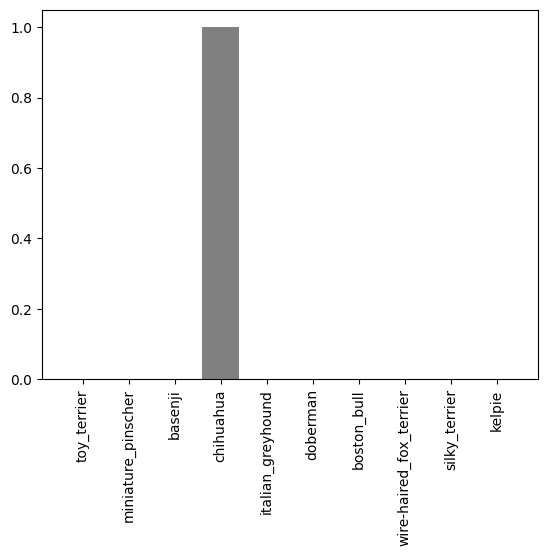

In [143]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

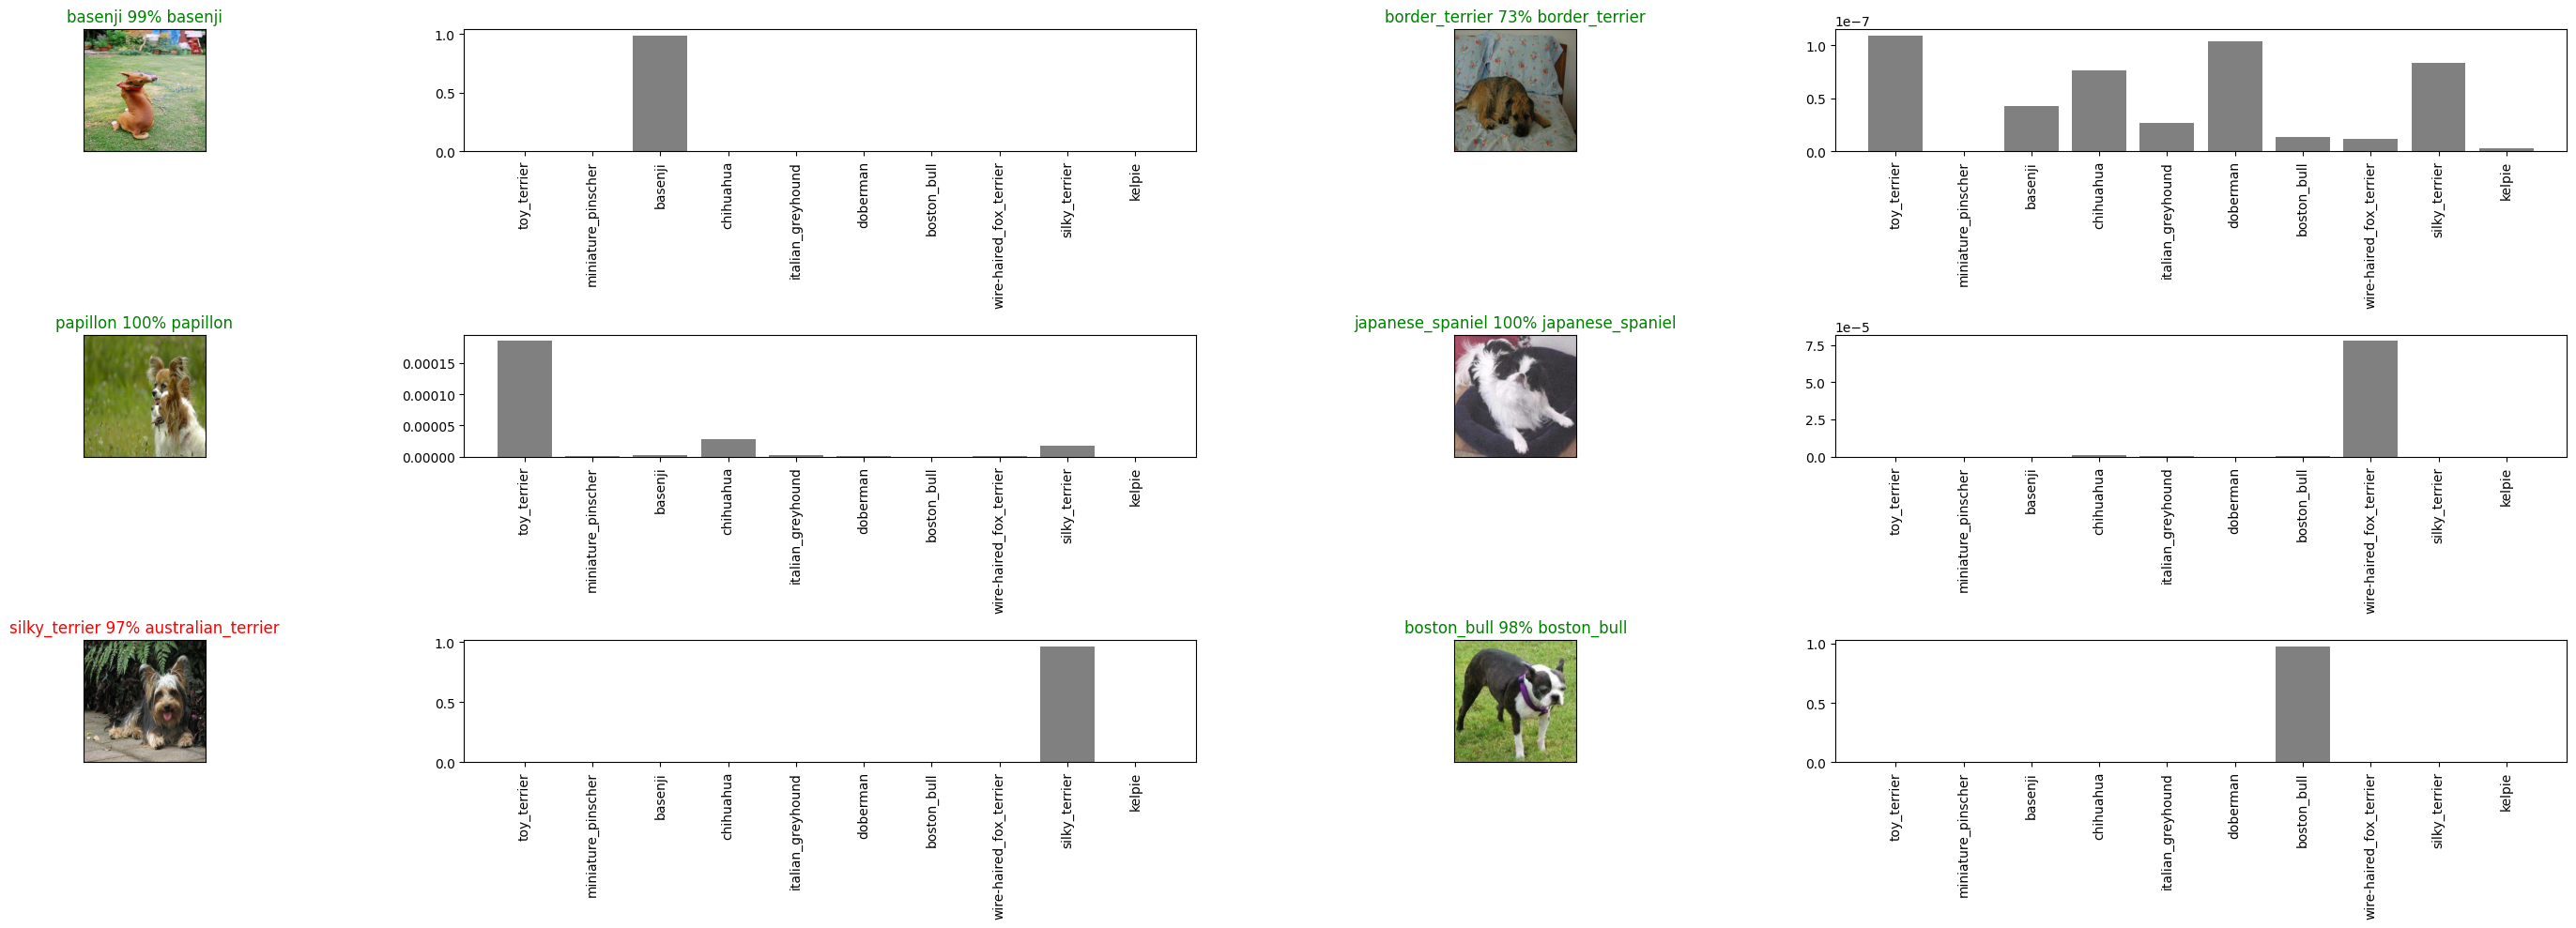

In [152]:
# Let's check out a few predictions and their differnent values
i_multiplier=22
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_rows,5*num_cols))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=predictions,
    labels=val_labels,
    images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
    labels=val_labels,
              n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [159]:
# Create a function to save a model
def save_model(model,suffix=None):
    """
    Saves a given model in a models diretory and appends a siffix(String)
    """
    #Create a model directory pathname with current time
    model_dir=os.path.join("Dog_Vision/models",datetime.datetime.now().strftime("%d%m%Y-%H%M%f"))
    model_path=model_dir+"-"+suffix+".h5" # Save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [166]:
#Create a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path
    """
    print(f"Loading saved model from :{model_path}")
    model=tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    print("Succesfully loaded model")
    return model

In [167]:
# Save our model with 1000 images
save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving model to: Dog_Vision/models\11022024-0008393866-1000-images-mobilenetv2-Adam.h5...


'Dog_Vision/models\\11022024-0008393866-1000-images-mobilenetv2-Adam.h5'

In [168]:
loaded_1000_image_model=load_model("Dog_Vision/models\\11022024-0005670302-1000-images-mobilenetv2-Adam.h5")

Loading saved model from :Dog_Vision/models\11022024-0005670302-1000-images-mobilenetv2-Adam.h5
Succesfully loaded model


In [169]:
model.evaluate(val_data)

64/64 [==============================] - 6s 85ms/step - loss: 0.6940 - accuracy: 0.8083


[0.6939709186553955, 0.8083129525184631]

In [170]:
loaded_1000_image_model.evaluate(val_data)

64/64 [==============================] - 7s 86ms/step - loss: 0.6940 - accuracy: 0.8083


[0.6939709186553955, 0.8083129525184631]

## Training a big dog model on the full data

In [171]:
len(X_train)

8177

In [175]:
full_data=create_data_batches(X,y)

Creating training data batches
Succesfully created batches


In [176]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [180]:
# Create a model for full models
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [181]:
# Create full model callback
full_model_tensorboard=create_tensorboard_callback()
#  No validation set when training on all the data , so we can't monitor validation acuuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)


## Note
Running the cell below will take a little while

In [182]:
#Fit the full model to the full data
epochs = NUM_EPOCHS.value
full_model.fit(x=full_data,epochs=epochs,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 32s 86ms/step - loss: 1.3100 - accuracy: 0.6715
Epoch 2/100
320/320 [==============================] - 28s 87ms/step - loss: 0.3966 - accuracy: 0.8817
Epoch 3/100
320/320 [==============================] - 28s 86ms/step - loss: 0.2363 - accuracy: 0.9354
Epoch 4/100
320/320 [==============================] - 27s 85ms/step - loss: 0.1524 - accuracy: 0.9641
Epoch 5/100
320/320 [==============================] - 27s 85ms/step - loss: 0.1068 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 27s 85ms/step - loss: 0.0788 - accuracy: 0.9858
Epoch 7/100
320/320 [==============================] - 27s 86ms/step - loss: 0.0588 - accuracy: 0.9919
Epoch 8/100
320/320 [==============================] - 27s 85ms/step - loss: 0.0458 - accuracy: 0.9952
Epoch 9/100
320/320 [==============================] - 28s 87ms/step - loss: 0.0372 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 28s 86ms/step - l

In [183]:
save_model(full_model,suffix="full-image-set_modebilenetv2-Adam")

Saving model to: Dog_Vision/models\11022024-0058280250-full-image-set_modebilenetv2-Adam.h5...


'Dog_Vision/models\\11022024-0058280250-full-image-set_modebilenetv2-Adam.h5'

In [184]:
loaded_full_model=load_model("Dog_Vision/models\\11022024-0058280250-full-image-set_modebilenetv2-Adam.h5")

Loading saved model from :Dog_Vision/models\11022024-0058280250-full-image-set_modebilenetv2-Adam.h5
Succesfully loaded model


## Making predictions on the testing dataset
Since our models Has been trained on images in the form of tensor batches to make predictions on the test data will have to get it into the same format.
Luckily, we have created `create_data_batches()` function earlier, which can take a list of file names as input and convert them into tensor batches.
To make predictions on the test data we will have to:
* Get the test image filenames:
* Convert the file names into test data patches using `create_data_batches()` and setting the test data parameter to `true` (Since the test data doesn't have labels)
* Make a prediction array by passing the test batches to the `predict()` method called on our model.


In [192]:
# Load the test image filename
test_path="Dog_Vision/test"
test_filenames=[test_path+"/"+fname for fname in os.listdir(test_path)]
test_filenames[:10]

['Dog_Vision/test/000621fb3cbb32d8935728e48679680e.jpg',
 'Dog_Vision/test/00102ee9d8eb90812350685311fe5890.jpg',
 'Dog_Vision/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'Dog_Vision/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'Dog_Vision/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'Dog_Vision/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'Dog_Vision/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'Dog_Vision/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'Dog_Vision/test/002f80396f1e3db687c5932d7978b196.jpg',
 'Dog_Vision/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [193]:
len(test_filenames)

10357

In [194]:
#Create test data batch
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches


In [195]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [196]:
# Make prediction on test data batch using the loaded full model
test_predictions =loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 28s 85ms/step


In [ ]:
#102527/32=324

In [204]:
np.savetxt("Dog_Vision/preds_array.csv",test_predictions,delimiter=",")

In [206]:
test_predictions=np.loadtxt("Dog_Vision/preds_array.csv",delimiter=",")

 ## Preparing data set predictin for kaggle

In [209]:
# Create a pandas DataFrame with empty columns
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [215]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [216]:
preds_df

id affenpinscher afghan_hound  \
0      000621fb3cbb32d8935728e48679680e           NaN          NaN   
1      00102ee9d8eb90812350685311fe5890           NaN          NaN   
2      0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3      001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4      001a5f3114548acdefa3d4da05474c2e           NaN          NaN   
...                                 ...           ...          ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8           NaN          NaN   
10353  fff1ec9e6e413275984966f745a313b0           NaN          NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4           NaN          NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3           NaN          NaN   
10356  fffbff22c1f51e3dc80c4bf04089545b           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [217]:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   5.501016e-12  5.074844e-12   
1  00102ee9d8eb90812350685311fe5890   2.053583e-06  3.841784e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   9.128351e-12  1.210505e-06   
3  001510bc8570bbeee98c8d80c8a95ec1   2.257384e-06  6.764814e-07   
4  001a5f3114548acdefa3d4da05474c2e   5.799472e-05  1.298418e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         9.514193e-15  1.774729e-13                    4.413466e-13   
1         2.337880e-08  1.268726e-09                    5.369735e-07   
2         9.602275e-09  9.537970e-12                    3.216895e-11   
3         1.545559e-06  1.455530e-05                    3.289906e-05   
4         7.118413e-09  6.621168e-10                    2.766825e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.823600e-12        2.753157e-16  5.207560e-13  3.244863e-14  ...   
1  5.434726e-09        6.685854e-07  1.993863e-07  2.592011e-08  ...   
2  1.318173e-08        2.925248e-11  1.109473e-12  3.989667e-09  ...   
3  1.357133e-05        1.664119e-10  4.814486e-08  5.494656e-08  ...   
4  3.748045e-12        2.057839e-10  4.757186e-09  1.128501e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.361792e-12  3.093035e-14  2.429150e-14  2.029696e-15  6.370177e-15   
1  8.207639e-09  2.338689e-07  1.828827e-09  1.371726e-06  1.809281e-08   
2  2.581275e-12  8.999007e-12  2.502293e-07  1.661764e-06  7.494098e-08   
3  2.637615e-06  5.901403e-10  4.255505e-06  1.129619e-08  2.250345e-06   
4  2.322971e-07  4.836180e-11  4.474809e-11  2.979047e-11  1.314636e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            8.335953e-13                 4.792700e-13  1.281908e-13   
1            1.511929e-07                 1.327119e-04  3.919032e-11   
2            3.691784e-08                 2.641621e-12  7.697762e-07   
3            5.738032e-09                 3.319692e-15  3.567681e-02   
4            2.365489e-09                 5.376074e-11  3.009841e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             6.929355e-10       2.563066e-11  
1             1.801073e-07       1.102065e-09  
2             2.324045e-11       9.526970e-12  
3             6.201236e-10       8.496423e-08  
4             5.247044e-10       5.784274e-08  

[5 rows x 121 columns]

In [ ]:
# Saving the csv file
# preds_df.to_csv("Dog_Vision/",index=False)